# 주택 거래량 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
volume_df = pd.read_excel('../data/added_features/주택매매거래량(거래량)-월별.xlsx')

In [3]:
volume_df

,구분,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,서울,16826,12029,13487,14349,12552,10879,12243,12253,10706,...,6716,6396,5442,4961,4073,4699,4795,6098,7898,8445
1,전국,78794,65573,74493,77044,73749,65774,70405,68478,56938,...,51578,49448,47799,45415,38036,43033,43491,52816,58215,57436
2,수도권,45930,36382,40679,42561,40295,36644,39082,37089,33669,...,23277,22741,19791,18010,15083,17608,18916,22722,27124,27603
3,지방,32864,29191,33814,34483,33454,29130,31323,31389,23269,...,28301,26707,28008,27405,22953,25425,24575,30094,31091,29833


In [4]:
volume_df.drop(['구분'], axis=1, inplace=True)
volume_df

,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,'07.10,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,16826,12029,13487,14349,12552,10879,12243,12253,10706,15410,...,6716,6396,5442,4961,4073,4699,4795,6098,7898,8445
1,78794,65573,74493,77044,73749,65774,70405,68478,56938,82327,...,51578,49448,47799,45415,38036,43033,43491,52816,58215,57436
2,45930,36382,40679,42561,40295,36644,39082,37089,33669,46151,...,23277,22741,19791,18010,15083,17608,18916,22722,27124,27603
3,32864,29191,33814,34483,33454,29130,31323,31389,23269,36176,...,28301,26707,28008,27405,22953,25425,24575,30094,31091,29833


In [5]:
cols = volume_df.columns
cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]
cols

[200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 

In [6]:
volume_df.columns = cols
volume_df

,200701,200702,200703,200704,200705,200706,200707,200708,200709,200710,...,202308,202309,202310,202311,202312,202401,202402,202403,202404,202405
0,16826,12029,13487,14349,12552,10879,12243,12253,10706,15410,...,6716,6396,5442,4961,4073,4699,4795,6098,7898,8445
1,78794,65573,74493,77044,73749,65774,70405,68478,56938,82327,...,51578,49448,47799,45415,38036,43033,43491,52816,58215,57436
2,45930,36382,40679,42561,40295,36644,39082,37089,33669,46151,...,23277,22741,19791,18010,15083,17608,18916,22722,27124,27603
3,32864,29191,33814,34483,33454,29130,31323,31389,23269,36176,...,28301,26707,28008,27405,22953,25425,24575,30094,31091,29833


In [7]:
volume_df = pd.DataFrame(volume_df.iloc[0])
volume_df.reset_index(inplace=True)
volume_df.columns = ['년도월', '거래량']
volume_df

,년도월,거래량
0,200701,16826
1,200702,12029
2,200703,13487
3,200704,14349
4,200705,12552
...,...,...
204,202401,4699
205,202402,4795
206,202403,6098
207,202404,7898


# 시각화

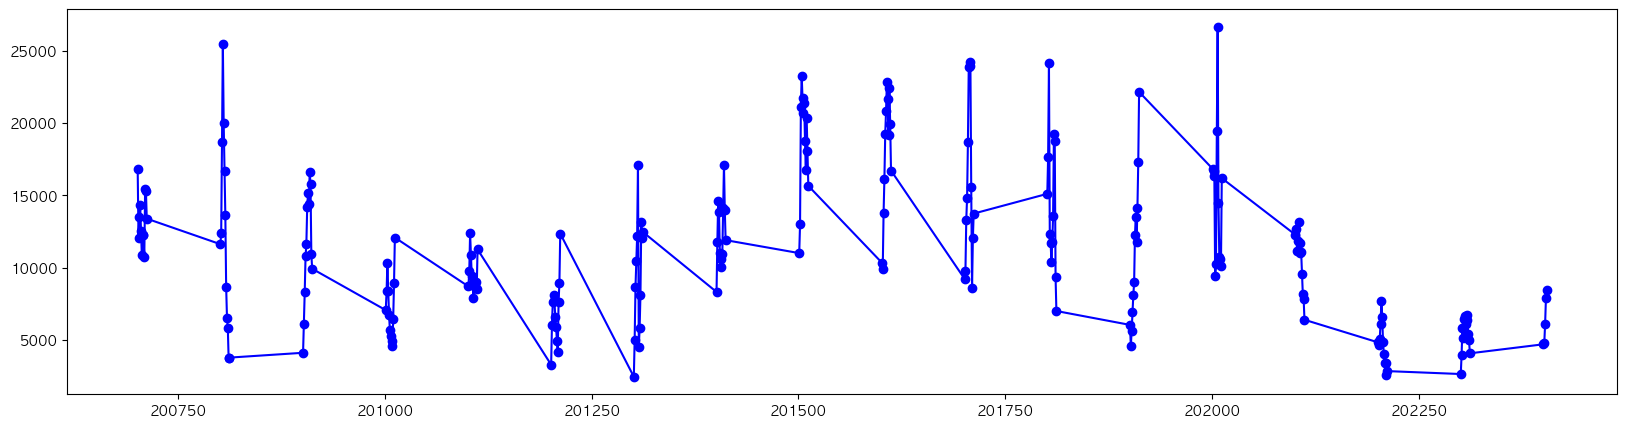

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(volume_df['년도월'], volume_df['거래량'], marker='o', linestyle='-', color='b')
plt.show()

# 원본에 적용

In [11]:
df = pd.read_csv('../data/preprocessed/9_unsold_house.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_38082/1338943434.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/9_unsold_house.csv')


In [12]:
volume_mapping = pd.Series({ym:volume for ym, volume in zip(volume_df['년도월'], volume_df['거래량'])})

df['거래량'] = np.nan
df['거래량'] = df['거래량'].fillna(df['계약년월'].map(volume_mapping))

In [13]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가,미분양,거래량
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0,13740.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0,45.0,15107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0,1081.0,6081.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0,1081.0,6081.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,7.0,2023,8,1712792.9,3.5,3.3,99.133,34043.0,976.0,6716.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,7.0,2023,9,1712792.9,3.5,3.3,99.324,34043.0,914.0,6396.0


In [14]:
df.to_csv('../data/preprocessed/10_volume.csv', index=False)